## 0. 모델 훈련

머신러닝 모델의 작동원리를 이해해야하는 이유

* 최적의 모델을 선정  
* 올바른 훈련알고리즘 선정  
* 최적의 하이퍼파라미터 찾기  

가 가능해진다.

 `비용 함수 (Cost Function)`

선형 회귀의 비용 함수 $J(\theta)$는 다음과 같이 정의된다:

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$$

이를 행렬 형태로 표현하면:

$$J(\theta) = \frac{1}{2m} \| X \theta - y \|^2$$

 `정규방정식 (Normal Equation)`

비용 함수 $J(\theta)$ 를 최소화하는 $\theta$ 를 찾기 위해, 정규방정식은 다음과 같이 도출된다:  
(비용함수를 $\theta$로 미분함.)

$$X^T X \theta = X^T y$$

이를 풀어서 최적의 $ \theta $를 구하면:

$$\theta = (X^T X)^{-1} X^T y$$

## 1. 정규방정식과 특잇값분해를 이용한 선형회귀

In [52]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

# 한글 글꼴 설정 (여기서는 'Malgun Gothic'을 사용)
plt.rcParams['font.family'] = 'D2Coding'

In [30]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) #잡음을 일부로 더해줌.

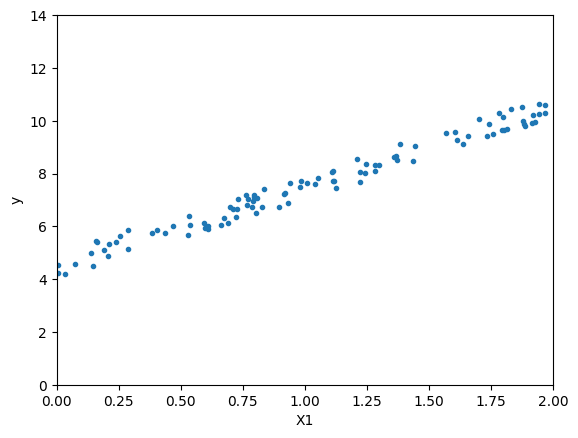

In [36]:
plt.plot(X, y, '.')

plt.xlabel('X1')
plt.ylabel('y')

plt.xlim(0, 2)
plt.ylim(0, 14)

plt.show()

정규방정식을 이용하여 $\theta$ 를 계산해보자.

In [34]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [35]:
theta_best

array([[4.49200748],
       [2.99841693]])

In [38]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49200748],
       [10.48884135]])

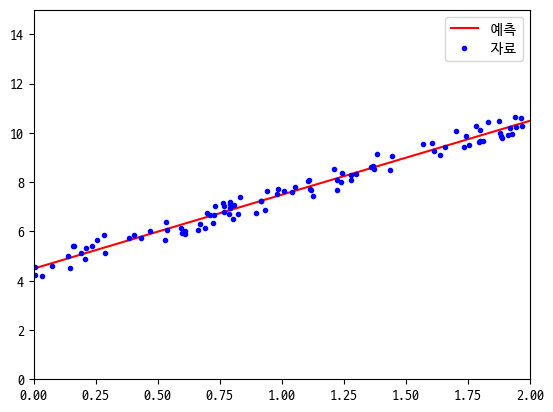

In [53]:
plt.plot(X_new, y_predict, 'r-', label='예측')
plt.plot(X, y, "b.", label='자료')
plt.axis([0,2, 0,15])
plt.legend(loc="best")
plt.show()

사이킷런에서 지원하는 선형회귀를 이용해보자.

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [57]:
lin_reg.intercept_, lin_reg.coef_

(array([4.49200748]), array([[2.99841693]]))

In [58]:
lin_reg.predict(X_new)

array([[ 4.49200748],
       [10.48884135]])

LinearRegression 클래스는 scipy.linalg.lstsq()메서드를 기반으로한다. 이 메서드를 직접 호출해도된다.

In [59]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.49200748],
       [2.99841693]])

In [60]:
np.linalg.pinv(X_b).dot(y)

array([[4.49200748],
       [2.99841693]])

정규방정식보다 SVD 방식을 이용하면 계산 복잡도를 비교적 낮출 수 있다. 하지만 특성이 매우 많고 훈련샘플이 많아도 괜찮을 것인가....